In [1]:
import numerapi
import pandas as pd
from models_to_eval import models as models_to_eval
from utils import get_model_performance, query_answer_to_clean_df
import matplotlib.pyplot as plt
import numpy as np
napi = numerapi.NumerAPI()

In [2]:
# Get models
model_evals = []
for model_name in models_to_eval:
    result = get_model_performance(model_name)
    df = query_answer_to_clean_df(result)
    model_evals.append(df)

In [3]:
# Some parameters
MIN_ROUND = 471
TO_ANALYSE = ["v2_corr20", "tc"]
###
metrics = {}

In [4]:
for model_eval in model_evals:
    evals_filtered = model_eval[model_eval["roundNumber"] >= MIN_ROUND]
    model_name = evals_filtered["model_name"].unique()[0]
    metrics[model_name] = {}
    for metric in TO_ANALYSE:
        metrics[model_name]["mean_" + metric] = evals_filtered[metric].mean()
        metrics[model_name]["sharp_ratio_" + metric] = (
            evals_filtered[metric].mean() / evals_filtered[metric].std()
        )

In [5]:
metrics_df = pd.DataFrame(metrics).T

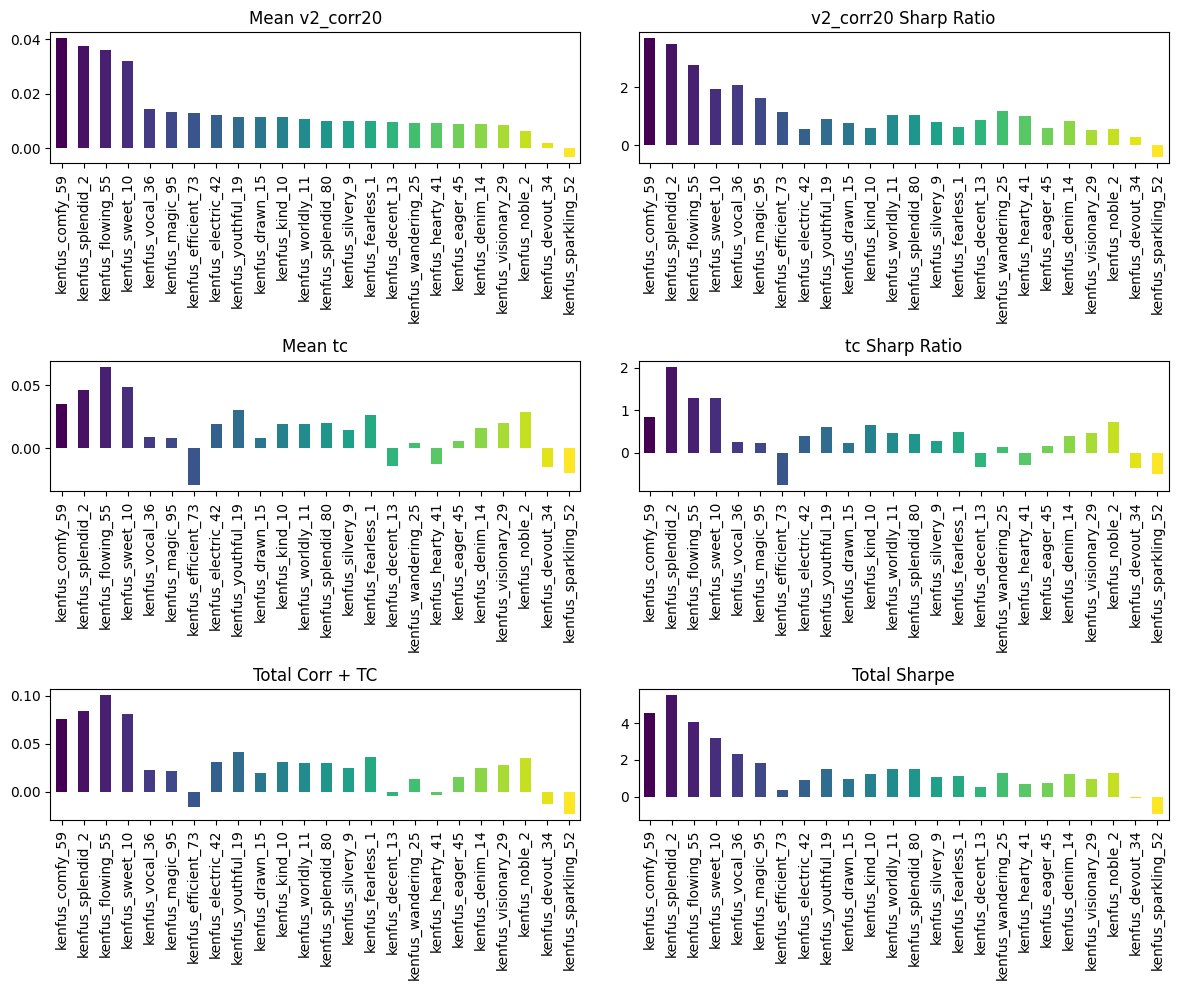

In [6]:
# Sort the DataFrame based on a key metric (e.g., 'mean_corr') for consistent color mapping
sorted_df = metrics_df.sort_values(by='mean_v2_corr20', ascending=False)
# Create some new metrics
sorted_df['total_corr_tc_mmc'] = sorted_df['mean_v2_corr20'] + sorted_df['mean_tc']
sorted_df['total_sharpe'] = sorted_df['sharp_ratio_v2_corr20'] + sorted_df['sharp_ratio_tc']
# Define colors for each model for visual comparison
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_df)))

# Plot each metric with consistent sorting and color mapping
fig, axes = plt.subplots(nrows=len(TO_ANALYSE) + 1, ncols=2, figsize=(12, 5 * len(TO_ANALYSE)))

for i, metric in enumerate(TO_ANALYSE):
    # Use the sorted DataFrame for plotting
    sorted_df["mean_" + metric].plot(kind="bar", ax=axes[i][0], title="Mean " + metric, color=colors)
    sorted_df["sharp_ratio_" + metric].plot(kind="bar", ax=axes[i][1], title=metric + " Sharp Ratio", color=colors)

# Plot the total metrics
sorted_df["total_corr_tc_mmc"].plot(kind="bar", ax=axes[len(TO_ANALYSE)][0], title="Total Corr + TC", color=colors)
sorted_df["total_sharpe"].plot(kind="bar", ax=axes[len(TO_ANALYSE)][1], title="Total Sharpe", color=colors)

# Calculate total, e.g. sum the mean corr and tc and all the sharp ratios
sorted_df["total"] = sorted_df["mean_v2_corr20"] + sorted_df["mean_tc"] + sorted_df["sharp_ratio_v2_corr20"] + sorted_df["sharp_ratio_tc"]


plt.tight_layout()
plt.show()
